**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 

import numpy as np

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [3]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [22]:
classification_problem

(array([[ 2.21886651,  1.38263506],
        [ 2.07169996, -1.07356824],
        [-1.93977262, -0.85055602],
        [ 2.08436759,  1.07500638],
        [ 0.94998372,  0.61538543],
        [-0.3878893 , -0.95580336],
        [ 1.98118534,  0.58871202],
        [ 1.65508134, -1.29954273],
        [ 2.60996691,  0.67390406],
        [-0.29137472, -0.2257671 ],
        [-0.98418733, -0.29293569],
        [-0.15399877,  0.42254322],
        [-0.22167729, -0.32467969],
        [ 2.88285048, -1.44657734],
        [ 1.17459743, -0.90427191],
        [-0.31704075, -0.34842358],
        [ 1.48023527, -1.08130433],
        [ 1.51863252, -1.23980866],
        [-0.7044121 , -0.06132962],
        [ 1.06060558,  0.83918244],
        [ 3.04237626, -2.38948447],
        [-1.60671473, -1.21737505],
        [-0.2410213 , -0.44815041],
        [ 1.88783328, -1.70376068],
        [ 0.1286542 , -0.52542956],
        [-1.68428971,  1.29496961],
        [-0.7699091 , -0.5500474 ],
        [ 3.06365602, -2.161

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

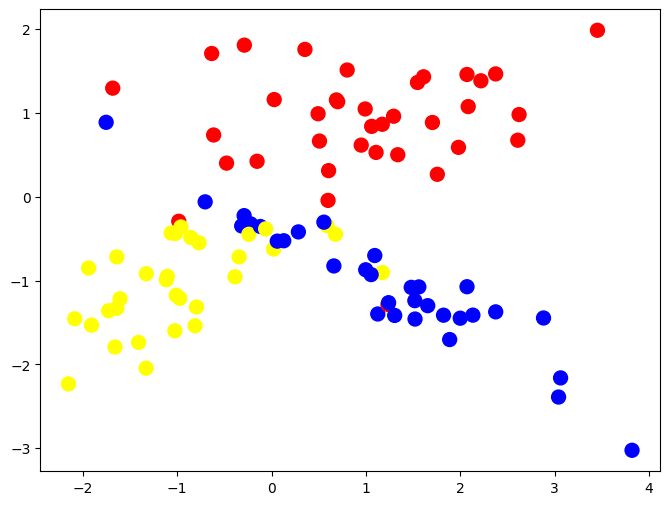

In [5]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)


In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier

In [7]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [8]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [9]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Разделяющая поверхность

In [10]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [11]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

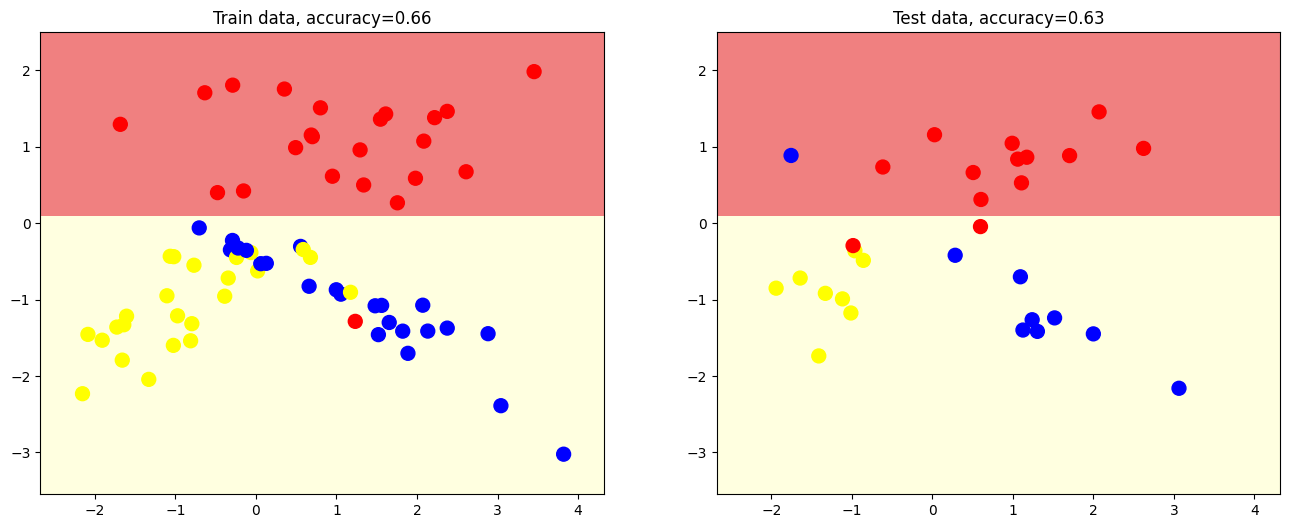

In [12]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

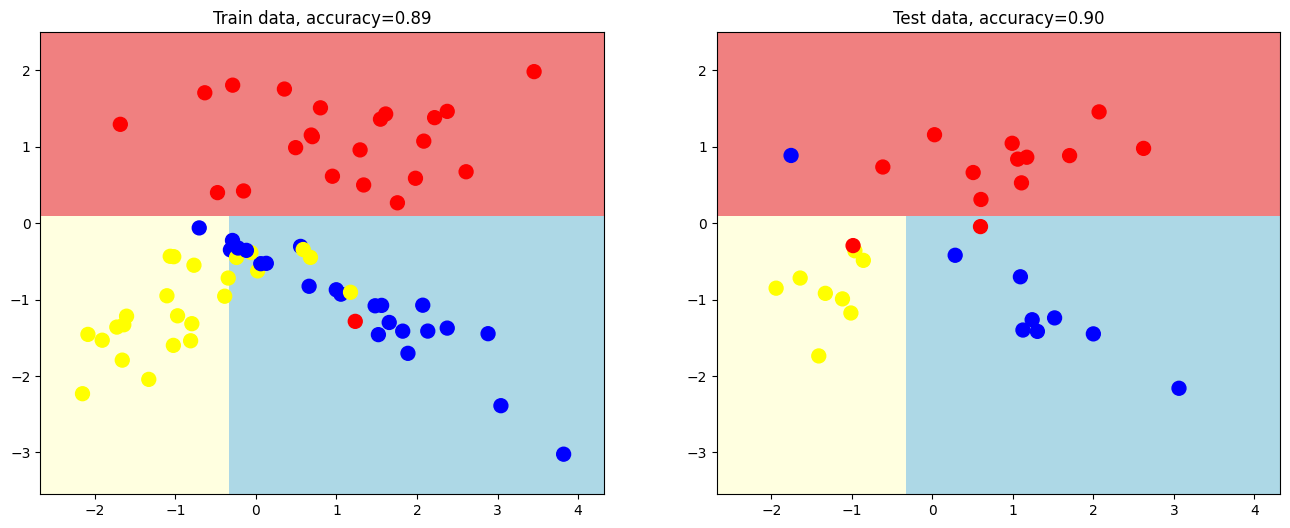

In [13]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

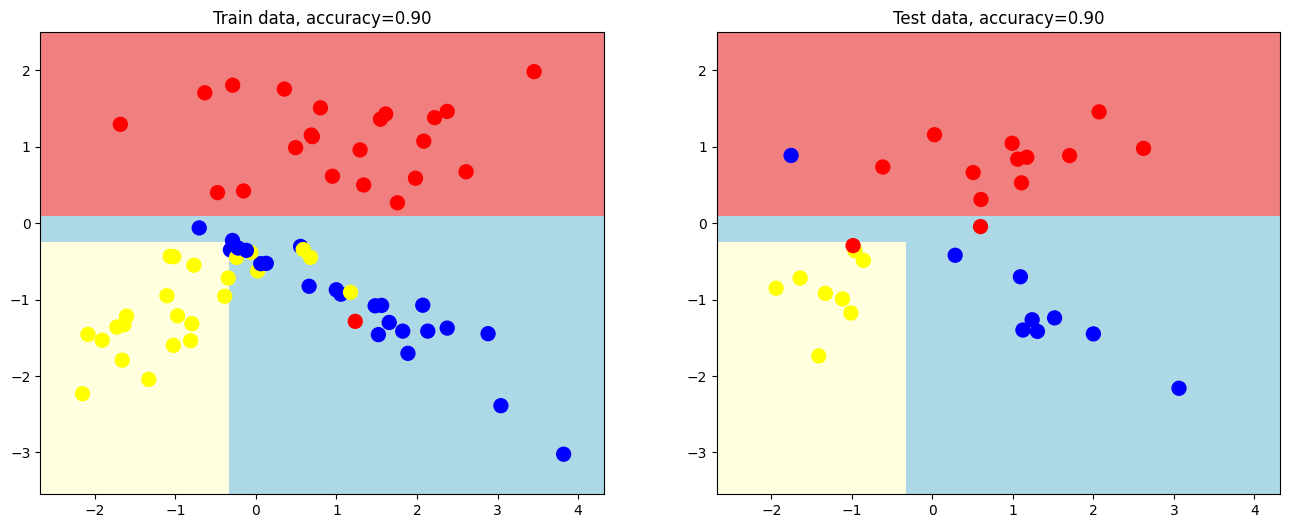

In [26]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

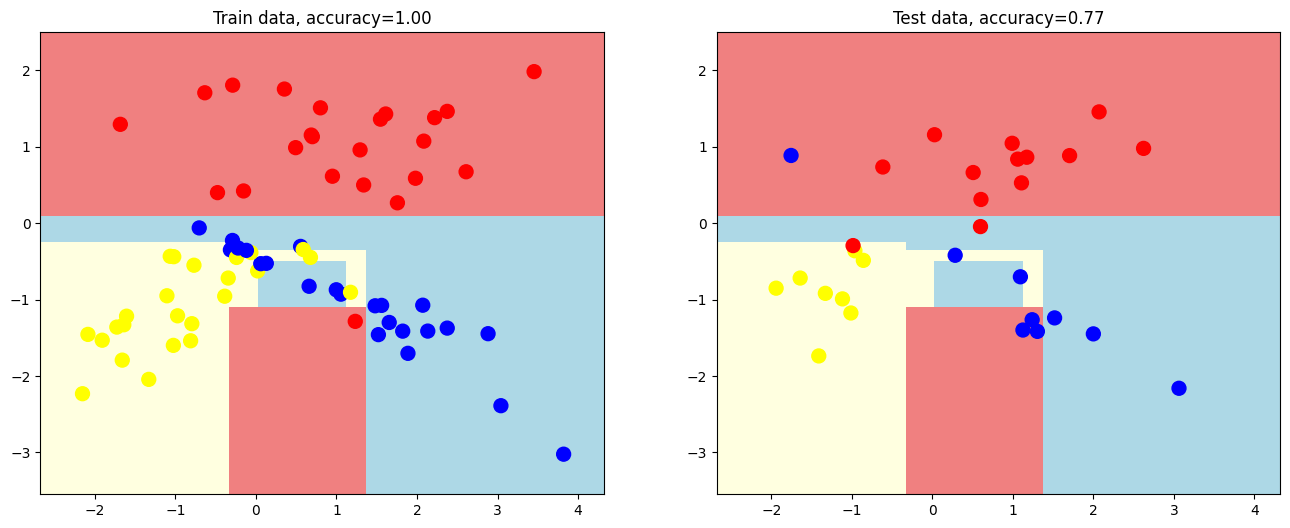

In [15]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

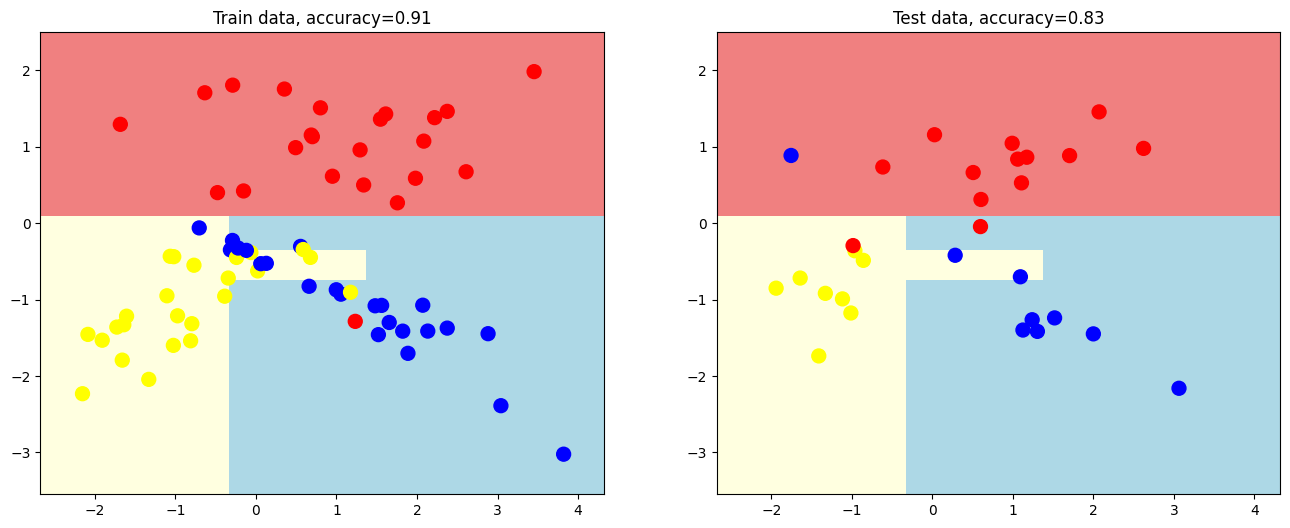

In [16]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4), 
                      train_data, train_labels, test_data, test_labels)

# Задание 5.4.1

Пусть дана следующая выборка из пяти объектов (первый признак — деньги, второй — время):

[250, 45]

[100, 35]

[400, 30]

[250, 60]

[300, 50]

Сколько из них попадёт в красный лист?

In [32]:
data = [
    [250, 45],
    [100, 35],
    [400, 30],
    [250, 60],
    [300, 50]
]

clf = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)
predictions = clf.predict(data)

predictions

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.